#### MTA Project  - Canal Street Small Business Association
###### In this notebook
- Data from September to November 2021
- Final result output ot csv

In [1]:
reset -fs

In [2]:
import pandas as pd
import numpy as np
import sqlalchemy as alchem
from sqlalchemy import inspect
from sqlalchemy import create_engine 
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [3]:
engine = create_engine("sqlite:///sep_nov_21.db")
engine.connect()

In [4]:
"""
In the next few cells, I just experiment with sqlalchemy and syntax. Here I'm creating a variable
to define my column selections use it as part of string literal in a query
"""

columns_to_select = ['CA', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']
my_select = 'SELECT '

for name in columns_to_select:
    my_select = my_select + name +', '
my_select = my_select[:-2]
my_select

'SELECT CA, UNIT, SCP, STATION, DATE, TIME, DESC, ENTRIES, EXITS'

In [5]:

"""
Just a test a to put a query in a dataframe
"""

test_df = pd.read_sql(f'{my_select}\
                      FROM  mta_data WHERE STATION = "CANAL ST";', 
                       engine)
test_df.sort_values("DATE").tail()

,CA,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS
1719,N089,R139,00-04-01,CANAL ST,11/26/2021,15:00:00,REGULAR,2114139,545455
1718,N089,R139,00-04-01,CANAL ST,11/26/2021,11:00:00,REGULAR,2114089,545417
1717,N089,R139,00-04-01,CANAL ST,11/26/2021,07:00:00,REGULAR,2114068,545395
292,A043,R462,00-03-03,CANAL ST,11/26/2021,16:00:00,REGULAR,61656,67363
248,A043,R462,00-03-02,CANAL ST,11/26/2021,08:00:00,REGULAR,4387324,1963778


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31728 entries, 0 to 31727
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   CA       31728 non-null  object
 1   UNIT     31728 non-null  object
 2   SCP      31728 non-null  object
 3   STATION  31728 non-null  object
 4   DATE     31728 non-null  object
 5   TIME     31728 non-null  object
 6   DESC     31728 non-null  object
 7   ENTRIES  31728 non-null  int64 
 8   EXITS    31728 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 2.2+ MB


In [7]:
test_df.columns

Index(['CA', 'UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS'],
      dtype='object')

In [8]:
"""
Looking at recovery audits with a sqlalchemy query
"""

pd.read_sql('SELECT *\
                      FROM  mta_data WHERE STATION = "CANAL ST" \
                      AND NOT DESC  =  "REGULAR" \
                      ;', \
                       engine)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,10/31/2021,13:00:00,RECOVR AUD,371828522,456794535
1,A043,R462,00-00-01,CANAL ST,JNQRZ6W,BMT,10/31/2021,13:00:00,RECOVR AUD,355856193,441413833
2,A043,R462,00-00-02,CANAL ST,JNQRZ6W,BMT,10/31/2021,13:00:00,RECOVR AUD,14666795,14141195
3,A043,R462,00-03-00,CANAL ST,JNQRZ6W,BMT,10/31/2021,13:00:00,RECOVR AUD,5767049,4120713
4,A043,R462,00-03-01,CANAL ST,JNQRZ6W,BMT,10/31/2021,13:00:00,RECOVR AUD,5370313,1842779
...,...,...,...,...,...,...,...,...,...,...,...
60,N090,R139,01-00-02,CANAL ST,ACE,IND,09/25/2021,20:00:00,RECOVR AUD,1890828,1011635
61,N090,R139,01-03-00,CANAL ST,ACE,IND,09/25/2021,20:00:00,RECOVR AUD,10700784,2449652
62,N090,R139,01-05-00,CANAL ST,ACE,IND,09/25/2021,20:00:00,RECOVR AUD,1642719,638917
63,N090,R139,01-06-00,CANAL ST,ACE,IND,09/25/2021,20:00:00,RECOVR AUD,368139,1491529


In [9]:

"""
Examining data around audit anomalies with sqlalchemey query

"""

pd.read_sql('SELECT *\
                      FROM  mta_data \
                      WHERE STATION = "CANAL ST" \
                      AND TIME = "21:00:00" \
                      AND DATE = "10/28/2021"\
                      ;', \
                       engine)

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A043,R462,00-00-00,CANAL ST,JNQRZ6W,BMT,10/28/2021,21:00:00,REGULAR,371827470,456792118
1,A043,R462,00-00-01,CANAL ST,JNQRZ6W,BMT,10/28/2021,21:00:00,REGULAR,355855007,441410820
2,A043,R462,00-00-02,CANAL ST,JNQRZ6W,BMT,10/28/2021,21:00:00,REGULAR,14665079,14138082
3,A043,R462,00-03-00,CANAL ST,JNQRZ6W,BMT,10/28/2021,21:00:00,REGULAR,5766024,4119672
4,A043,R462,00-03-01,CANAL ST,JNQRZ6W,BMT,10/28/2021,21:00:00,REGULAR,5369619,1842413
5,A043,R462,00-03-02,CANAL ST,JNQRZ6W,BMT,10/28/2021,21:00:00,REGULAR,4380238,1958114
6,A043,R462,00-03-03,CANAL ST,JNQRZ6W,BMT,10/28/2021,21:00:00,REGULAR,54812,59104
7,A043,R462,00-03-04,CANAL ST,JNQRZ6W,BMT,10/28/2021,21:00:00,REGULAR,8987888,9033667
8,A043,R462,00-06-00,CANAL ST,JNQRZ6W,BMT,10/28/2021,21:00:00,REGULAR,1247273,481144
9,A043,R462,00-06-01,CANAL ST,JNQRZ6W,BMT,10/28/2021,21:00:00,REGULAR,4282387,1956919


In [10]:
pd.read_sql('SELECT *, COUNT(ENTRIES)\
            FROM  mta_data \
            WHERE STATION = "CANAL ST" AND DESC = "REGULAR" \
            GROUP BY LINENAME, DATE, TIME \
            ORDER BY LINENAME;', engine).drop('DIVISION', axis = 1)

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,COUNT(ENTRIES)
0,R119,R320,00-00-00,CANAL ST,1,08/28/2021,01:00:00,REGULAR,1905241,787733,6
1,R119,R320,00-00-00,CANAL ST,1,08/28/2021,05:00:00,REGULAR,1905251,787737,6
2,R119,R320,00-00-00,CANAL ST,1,08/28/2021,09:00:00,REGULAR,1905258,787741,6
3,R119,R320,00-00-00,CANAL ST,1,08/28/2021,13:00:00,REGULAR,1905275,787761,6
4,R119,R320,00-00-00,CANAL ST,1,08/28/2021,17:00:00,REGULAR,1905334,787800,6
...,...,...,...,...,...,...,...,...,...,...,...
1639,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/26/2021,04:00:00,REGULAR,371842371,456823041,33
1640,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/26/2021,08:00:00,REGULAR,371842372,456823082,33
1641,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/26/2021,12:00:00,REGULAR,371842398,456823315,33
1642,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/26/2021,16:00:00,REGULAR,371842580,456823799,33


In [11]:
"""
At this point I have conducted some exploration and analyis with sqlalchemey queries. I pull data
into a dataframe, excluding any rows where DESC is not "REGULAR". This exlcudes all rows with 
audit resets.
"""
 
df = pd.read_sql('SELECT *\
            FROM  mta_data \
            WHERE STATION = "CANAL ST" AND DESC = "REGULAR" '\
            , engine).drop('DIVISION', axis = 1)
df

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS
0,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,371839594,456816992
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,04:00:00,REGULAR,371839605,456817005
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,08:00:00,REGULAR,371839607,456817045
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,12:00:00,REGULAR,371839631,456817335
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,16:00:00,REGULAR,371839755,456817752
...,...,...,...,...,...,...,...,...,...,...
31658,R120,R320,01-00-02,CANAL ST,1,09/03/2021,05:00:00,REGULAR,1481800,8365661
31659,R120,R320,01-00-02,CANAL ST,1,09/03/2021,09:00:00,REGULAR,1481803,8365771
31660,R120,R320,01-00-02,CANAL ST,1,09/03/2021,13:00:00,REGULAR,1481813,8365850
31661,R120,R320,01-00-02,CANAL ST,1,09/03/2021,17:00:00,REGULAR,1481827,8365945


In [12]:
"""
Analyzing time interval consistency by line name. 
A bit of a mess that will require further detailed analysis
"""

time_set_ACE = set(df[df.LINENAME == 'ACE'].TIME)
time_set_J = set(df[df.LINENAME == 'JNQRZ6W'].TIME)
time_set_1 = set(df[df.LINENAME == '1'].TIME)

print('line ACE \n', time_set_ACE)
print('-----------------------')
print('line JNQRZ6W\n', time_set_J)
print('-----------------------')
print('line 1\n', time_set_1)

line ACE 
 {'12:00:00', '16:00:00', '07:00:00', '15:00:00', '20:00:00', '08:00:00', '09:54:27', '19:00:00', '23:00:00', '11:00:00', '00:00:00', '03:00:00', '04:00:00'}
-----------------------
line JNQRZ6W
 {'12:00:00', '16:00:00', '17:00:00', '21:00:00', '07:54:16', '01:00:00', '07:58:22', '09:00:00', '20:00:00', '08:00:00', '08:27:53', '05:00:00', '07:56:57', '07:59:43', '00:00:00', '13:00:00', '04:00:00'}
-----------------------
line 1
 {'12:00:00', '16:00:00', '17:00:00', '21:00:00', '01:00:00', '09:00:00', '20:00:00', '08:00:00', '05:00:00', '00:00:00', '13:00:00', '04:00:00'}


In [13]:
# mask1 = ((df['LINENAME'] == 'JNQRZ6W') 
#         & (df['DATE'] == '08/30/2021') 
#         &((df['TIME'] == '07:58:22') 
#         | (df['TIME'] == '07:54:16')
#         | (df['TIME'] == '07:56:57') 
#         | (df['TIME'] == '07:59:43')
#         | (df['TIME'] == '08:27:53')
#          )
#        )

# df[mask1]


mask2 = ((df['LINENAME'] == 'JNQRZ6W') 
        & (df['DATE'] == '08/30/2021') 
#         & (df['CA'] == 'A043')
        & (df['UNIT'] == 'R462')
#         & (df['UNIT'] == 'R463')
#           & (df['UNIT'] == 'R118')
#         & (df['SCP'] == '00-00-00')
        
#         &((df['TIME'] == '07:58:22') 
#         | (df['TIME'] == '07:54:16')
#         | (df['TIME'] == '07:56:57') 
#         | (df['TIME'] == '07:59:43')
#         | (df['TIME'] == '08:27:53')
#         | (df['TIME'] == '04:00:00')
#          )
       )
df[mask2]

# mask3 = ((df['LINENAME'] == 'JNQRZ6W') 
#         & (df['DATE'] == '09/06/2021') 
# #         & (df['CA'] == 'A043')
#         & (df['UNIT'] == 'R462')
#         )
         
# df[mask3]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS
29213,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/30/2021,01:00:00,REGULAR,371796820,456734629
29214,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/30/2021,05:00:00,REGULAR,371796820,456734630
29215,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/30/2021,07:56:57,REGULAR,371796822,456734714
29216,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/30/2021,07:58:22,REGULAR,371796822,456734717
29217,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/30/2021,07:59:43,REGULAR,371796822,456734717
...,...,...,...,...,...,...,...,...,...,...
29667,A043,R462,00-06-02,CANAL ST,JNQRZ6W,08/30/2021,07:59:43,REGULAR,7558870,7521883
29668,A043,R462,00-06-02,CANAL ST,JNQRZ6W,08/30/2021,09:00:00,REGULAR,7558873,7521929
29669,A043,R462,00-06-02,CANAL ST,JNQRZ6W,08/30/2021,13:00:00,REGULAR,7558920,7522098
29670,A043,R462,00-06-02,CANAL ST,JNQRZ6W,08/30/2021,17:00:00,REGULAR,7559042,7522241


In [14]:
""" Drop duplicates from unit R462 on 08/30/2021"""

mask = ((df['LINENAME'] == 'JNQRZ6W') 
        & (df['DATE'] == '08/30/2021') 
        & (df['UNIT'] == 'R462')
       
        
       &((df['TIME'] == '07:58:22')
         | (df['TIME'] == '07:54:16')
         | (df['TIME'] == '07:56:57') 
         
         )
       )
df.drop(df[mask].index, inplace = True)


In [15]:
""" Checking to see if duplicates dropped"""
mask2 = ((df['LINENAME'] == 'JNQRZ6W') 
        & (df['DATE'] == '08/30/2021') 
        & (df['UNIT'] == 'R462')     
       )
df[mask2]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS
29213,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/30/2021,01:00:00,REGULAR,371796820,456734629
29214,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/30/2021,05:00:00,REGULAR,371796820,456734630
29217,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/30/2021,07:59:43,REGULAR,371796822,456734717
29218,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/30/2021,09:00:00,REGULAR,371796826,456734788
29219,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/30/2021,13:00:00,REGULAR,371796865,456735056
...,...,...,...,...,...,...,...,...,...,...
29667,A043,R462,00-06-02,CANAL ST,JNQRZ6W,08/30/2021,07:59:43,REGULAR,7558870,7521883
29668,A043,R462,00-06-02,CANAL ST,JNQRZ6W,08/30/2021,09:00:00,REGULAR,7558873,7521929
29669,A043,R462,00-06-02,CANAL ST,JNQRZ6W,08/30/2021,13:00:00,REGULAR,7558920,7522098
29670,A043,R462,00-06-02,CANAL ST,JNQRZ6W,08/30/2021,17:00:00,REGULAR,7559042,7522241


In [16]:
"""
Checking another odd time stamp. Data seems ok
"""


df[df['TIME'] == '23:00:00'].groupby(["LINENAME", 'DATE', 'TIME']).sum()

mask = ((df['LINENAME'] == 'ACE') 
#         & (df['DATE'] == '08/30/2021')
#         & (df['DATE'] == '09/13/2021')
        &((df['TIME'] == '09:54:27') 
#         | (df['TIME'] == '07:00:00')
#         | (df['TIME'] == '11:00:00') 
#         | (df['TIME'] == '15:00:00') 
#         | (df['TIME'] == '19:00:00')
#         | (df['TIME'] == '23:00:00')
         )
       )

df[mask]


,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS
25718,N089,R139,00-00-00,CANAL ST,ACE,09/13/2021,09:54:27,REGULAR,6383954,17589704
25761,N089,R139,00-00-01,CANAL ST,ACE,09/13/2021,09:54:27,REGULAR,516703,741026
25804,N089,R139,00-00-02,CANAL ST,ACE,09/13/2021,09:54:27,REGULAR,1767366,1346937
25847,N089,R139,00-03-00,CANAL ST,ACE,09/13/2021,09:54:27,REGULAR,514341,390527
25890,N089,R139,00-03-01,CANAL ST,ACE,09/13/2021,09:54:27,REGULAR,1196465,632839
25933,N089,R139,00-03-02,CANAL ST,ACE,09/13/2021,09:54:27,REGULAR,1887942,861170
25976,N089,R139,00-04-00,CANAL ST,ACE,09/13/2021,09:54:27,REGULAR,926568132,553959166
26019,N089,R139,00-04-01,CANAL ST,ACE,09/13/2021,09:54:27,REGULAR,2089370,536381
26062,N089,R139,00-04-02,CANAL ST,ACE,09/13/2021,09:54:27,REGULAR,3039062,1592001
26105,N089,R139,00-06-00,CANAL ST,ACE,09/13/2021,09:54:27,REGULAR,20479,280094


In [17]:
"""
Binning all time intervals to a consistent '00:00:00', '04:00:00', '08:00:00' '12:00:00' '16:00:00' '20:00:00'

"""

df['TIME'] = np.where(df['TIME'] == '01:00:00', '00:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '03:00:00', '04:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '05:00:00', '04:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '07:00:00', '08:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '07:59:43', '08:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '07:54:16', '08:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '08:27:53', '08:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '09:00:00', '08:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '09:54:27', '12:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '11:00:00', '12:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '13:00:00', '12:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '15:00:00', '16:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '17:00:00', '16:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '19:00:00', '20:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '21:00:00', '20:00:00',df['TIME'])

df['TIME'] = np.where(df['TIME'] == '23:00:00', '20:00:00',df['TIME'])

In [18]:
"""
Great. All my time intervals are binned consistently across all lines
"""

time_set_ACE = set(df[df.LINENAME == 'ACE'].TIME)
time_set_J = set(df[df.LINENAME == 'JNQRZ6W'].TIME)
time_set_1 = set(df[df.LINENAME == '1'].TIME)

print('line ACE \n', time_set_ACE)
print('-----------------------')
print('line JNQRZ6W\n', time_set_J)
print('-----------------------')
print('line 1\n', time_set_1)

line ACE 
 {'12:00:00', '16:00:00', '20:00:00', '08:00:00', '00:00:00', '04:00:00'}
-----------------------
line JNQRZ6W
 {'12:00:00', '16:00:00', '20:00:00', '08:00:00', '00:00:00', '04:00:00'}
-----------------------
line 1
 {'12:00:00', '16:00:00', '20:00:00', '08:00:00', '00:00:00', '04:00:00'}


In [19]:
"""
Add time stamp column
"""
df['date_time'] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time
0,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,371839594,456816992,2021-11-20 00:00:00
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,04:00:00,REGULAR,371839605,456817005,2021-11-20 04:00:00
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,08:00:00,REGULAR,371839607,456817045,2021-11-20 08:00:00
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,12:00:00,REGULAR,371839631,456817335,2021-11-20 12:00:00
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,16:00:00,REGULAR,371839755,456817752,2021-11-20 16:00:00


In [20]:

"""
Add day name and number columns
"""

df['day_num'] = df['date_time'].dt.dayofweek
df['day_name'] = df['date_time'].dt.day_name()

df.head()

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name
0,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,371839594,456816992,2021-11-20 00:00:00,5,Saturday
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,04:00:00,REGULAR,371839605,456817005,2021-11-20 04:00:00,5,Saturday
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,08:00:00,REGULAR,371839607,456817045,2021-11-20 08:00:00,5,Saturday
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,12:00:00,REGULAR,371839631,456817335,2021-11-20 12:00:00,5,Saturday
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,16:00:00,REGULAR,371839755,456817752,2021-11-20 16:00:00,5,Saturday


In [21]:

"""
Will drop data from last week of August to have clean  three months
"""

filtered_df = df.loc[(df['date_time'] <= '2021-09-01')]
filtered_df
mask_aug = (df['date_time'] <= '2021-09-01')
df[mask_aug]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name
29201,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/28/2021,00:00:00,REGULAR,371796293,456734460,2021-08-28 00:00:00,5,Saturday
29202,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/28/2021,04:00:00,REGULAR,371796300,456734462,2021-08-28 04:00:00,5,Saturday
29203,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/28/2021,08:00:00,REGULAR,371796303,456734465,2021-08-28 08:00:00,5,Saturday
29204,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/28/2021,12:00:00,REGULAR,371796329,456734477,2021-08-28 12:00:00,5,Saturday
29205,A043,R462,00-00-00,CANAL ST,JNQRZ6W,08/28/2021,16:00:00,REGULAR,371796433,456734501,2021-08-28 16:00:00,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31641,R120,R320,01-00-02,CANAL ST,1,08/31/2021,08:00:00,REGULAR,1481562,8364957,2021-08-31 08:00:00,1,Tuesday
31642,R120,R320,01-00-02,CANAL ST,1,08/31/2021,12:00:00,REGULAR,1481569,8365071,2021-08-31 12:00:00,1,Tuesday
31643,R120,R320,01-00-02,CANAL ST,1,08/31/2021,16:00:00,REGULAR,1481588,8365166,2021-08-31 16:00:00,1,Tuesday
31644,R120,R320,01-00-02,CANAL ST,1,08/31/2021,20:00:00,REGULAR,1481606,8365213,2021-08-31 20:00:00,1,Tuesday


In [22]:
df.drop(df[mask_aug].index, inplace = True)
# df[mask_aug]

In [23]:
"""
check for duplicate entries for each time interval. The one duplicate is occurring beacuse of re-bining
the time slots. 
"""
(df
 .groupby(["CA", "UNIT", "SCP", "STATION","LINENAME","date_time"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(15)

,CA,UNIT,SCP,STATION,LINENAME,date_time,ENTRIES
22574,N089,R139,00-06-01,CANAL ST,ACE,2021-11-12 20:00:00,2
24612,N090,R139,01-00-02,CANAL ST,ACE,2021-11-19 20:00:00,2
22559,N089,R139,00-06-01,CANAL ST,ACE,2021-11-09 20:00:00,2
26645,N090,R139,01-06-01,CANAL ST,ACE,2021-11-25 20:00:00,2
23646,N090,R139,01-00-00,CANAL ST,ACE,2021-11-26 20:00:00,2
23130,N089,R139,00-06-02,CANAL ST,ACE,2021-11-23 20:00:00,2
20560,N089,R139,00-04-00,CANAL ST,ACE,2021-11-10 20:00:00,2
22554,N089,R139,00-06-01,CANAL ST,ACE,2021-11-08 20:00:00,2
20094,N089,R139,00-03-02,CANAL ST,ACE,2021-11-17 20:00:00,2
19122,N089,R139,00-03-00,CANAL ST,ACE,2021-11-23 20:00:00,2


In [24]:

"""
Looking at what's going on with Saturday data
"""

mask = ((df['day_name'] == 'Saturday')
       & (df['TIME'] == '00:00:00')
       )

# mask = ((df['day_num'] == 5)
#        & (df['TIME'] == '00:00:00')
#        )
df[mask]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name
0,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,371839594,456816992,2021-11-20,5,Saturday
42,A043,R462,00-00-01,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,355867122,441441081,2021-11-20,5,Saturday
84,A043,R462,00-00-02,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,14684297,14168391,2021-11-20,5,Saturday
126,A043,R462,00-03-00,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,5776639,4129855,2021-11-20,5,Saturday
168,A043,R462,00-03-01,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,5376748,1846164,2021-11-20,5,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28991,R119,R320,00-00-01,CANAL ST,1,09/04/2021,00:00:00,REGULAR,10019284,3788433,2021-09-04,5,Saturday
29033,R119,R320,00-00-02,CANAL ST,1,09/04/2021,00:00:00,REGULAR,447542,168290,2021-09-04,5,Saturday
29075,R120,R320,01-00-00,CANAL ST,1,09/04/2021,00:00:00,REGULAR,46518,271611,2021-09-04,5,Saturday
29117,R120,R320,01-00-01,CANAL ST,1,09/04/2021,00:00:00,REGULAR,135,455,2021-09-04,5,Saturday


In [25]:
"""
Create columns for previous entries and exits with Shift 
"""

df[['prev_ent', 'prev_ex']] = df[['ENTRIES', 'EXITS']].shift(1)

df.head(7)

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex
0,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,371839594,456816992,2021-11-20 00:00:00,5,Saturday,NaN,NaN
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,04:00:00,REGULAR,371839605,456817005,2021-11-20 04:00:00,5,Saturday,371839594.0,456816992.0
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,08:00:00,REGULAR,371839607,456817045,2021-11-20 08:00:00,5,Saturday,371839605.0,456817005.0
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,12:00:00,REGULAR,371839631,456817335,2021-11-20 12:00:00,5,Saturday,371839607.0,456817045.0
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,16:00:00,REGULAR,371839755,456817752,2021-11-20 16:00:00,5,Saturday,371839631.0,456817335.0
5,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,20:00:00,REGULAR,371839985,456818112,2021-11-20 20:00:00,5,Saturday,371839755.0,456817752.0
6,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/21/2021,00:00:00,REGULAR,371840056,456818191,2021-11-21 00:00:00,6,Sunday,371839985.0,456818112.0


In [26]:
"""
Drop first row with Nan
"""

df.dropna(subset=['prev_ent'], axis=0, inplace=True)
df.head()

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,04:00:00,REGULAR,371839605,456817005,2021-11-20 04:00:00,5,Saturday,371839594.0,456816992.0
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,08:00:00,REGULAR,371839607,456817045,2021-11-20 08:00:00,5,Saturday,371839605.0,456817005.0
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,12:00:00,REGULAR,371839631,456817335,2021-11-20 12:00:00,5,Saturday,371839607.0,456817045.0
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,16:00:00,REGULAR,371839755,456817752,2021-11-20 16:00:00,5,Saturday,371839631.0,456817335.0
5,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,20:00:00,REGULAR,371839985,456818112,2021-11-20 20:00:00,5,Saturday,371839755.0,456817752.0


In [27]:

"""
Calculate columns for net entries and exists for each time interval and turnstile unit
"""

df['net_ent'] = df.ENTRIES - df.prev_ent 
df['net_ex'] = df.EXITS - df.prev_ex
df

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,04:00:00,REGULAR,371839605,456817005,2021-11-20 04:00:00,5,Saturday,371839594.0,456816992.0,11.0,13.0
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,08:00:00,REGULAR,371839607,456817045,2021-11-20 08:00:00,5,Saturday,371839605.0,456817005.0,2.0,40.0
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,12:00:00,REGULAR,371839631,456817335,2021-11-20 12:00:00,5,Saturday,371839607.0,456817045.0,24.0,290.0
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,16:00:00,REGULAR,371839755,456817752,2021-11-20 16:00:00,5,Saturday,371839631.0,456817335.0,124.0,417.0
5,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,20:00:00,REGULAR,371839985,456818112,2021-11-20 20:00:00,5,Saturday,371839755.0,456817752.0,230.0,360.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31658,R120,R320,01-00-02,CANAL ST,1,09/03/2021,04:00:00,REGULAR,1481800,8365661,2021-09-03 04:00:00,4,Friday,1481800.0,8365655.0,0.0,6.0
31659,R120,R320,01-00-02,CANAL ST,1,09/03/2021,08:00:00,REGULAR,1481803,8365771,2021-09-03 08:00:00,4,Friday,1481800.0,8365661.0,3.0,110.0
31660,R120,R320,01-00-02,CANAL ST,1,09/03/2021,12:00:00,REGULAR,1481813,8365850,2021-09-03 12:00:00,4,Friday,1481803.0,8365771.0,10.0,79.0
31661,R120,R320,01-00-02,CANAL ST,1,09/03/2021,16:00:00,REGULAR,1481827,8365945,2021-09-03 16:00:00,4,Friday,1481813.0,8365850.0,14.0,95.0


In [28]:
"""
More exploration of Saturday anomalies
"""

mask = ((df['day_name'] == 'Saturday')
       & (df['TIME'] == '00:00:00')
       )

# mask = ((df['day_num'] == 5)
#        & (df['TIME'] == '00:00:00')
#        )
df[mask].groupby(['LINENAME', 'DATE'])['net_ent'].describe()

count          mean           std           min  \
LINENAME DATE                                                          
1        09/04/2021    6.0  1.678647e+05  5.687023e+06 -9.573695e+06   
         09/11/2021    6.0  1.676657e+05  5.686532e+06 -9.571740e+06   
         09/18/2021    6.0  1.676312e+05  5.685899e+06 -9.569215e+06   
         09/25/2021    6.0  1.676915e+05  5.685214e+06 -9.566373e+06   
         10/02/2021    6.0  1.677015e+05  5.684563e+06 -9.563612e+06   
         10/09/2021    6.0  1.678587e+05  5.683812e+06 -9.560604e+06   
         10/16/2021    6.0  1.677735e+05  5.683244e+06 -9.558096e+06   
         10/23/2021    6.0  1.679722e+05  5.682521e+06 -9.554902e+06   
         10/30/2021    6.0  1.678908e+05  5.681982e+06 -9.552953e+06   
         11/06/2021    6.0  1.680020e+05  5.681762e+06 -9.550815e+06   
         11/13/2021    6.0  1.679532e+05  5.681029e+06 -9.547909e+06   
         11/20/2021    6.0  1.685018e+05  5.680138e+06 -9.544283e+06   
ACE      09/04/2021   19.0 -1.789750e+07  3.175815e+08 -9.244798e+08   
         09/11/2021   19.0 -1.789828e+07  3.175824e+08 -9.244839e+08   
         09/18/2021   19.0 -1.789883e+07  3.175834e+08 -9.244880e+08   
         09/25/2021   19.0 -1.789921e+07  3.175845e+08 -9.244925e+08   
         10/02/2021   19.0 -1.789955e+07  3.175855e+08 -9.244964e+08   
         10/09/2021   19.0 -1.789978e+07  3.175864e+08 -9.244999e+08   
         10/16/2021   19.0 -1.790030e+07  3.175874e+08 -9.245039e+08   
         10/23/2021   19.0 -1.790077e+07  3.175883e+08 -9.245072e+08   
         10/30/2021   19.0 -1.790135e+07  3.175891e+08 -9.245105e+08   
         11/06/2021   19.0 -1.790180e+07  3.175900e+08 -9.245141e+08   
JNQRZ6W  09/04/2021   33.0  1.027026e+07  4.427932e+08 -1.711370e+09   
         09/11/2021   33.0  1.027022e+07  4.427902e+08 -1.711352e+09   
         09/18/2021   33.0  1.027010e+07  4.427863e+08 -1.711332e+09   
         09/25/2021   33.0  1.027059e+07  4.427823e+08 -1.711310e+09   
         10/02/2021   33.0  1.027095e+07  4.427785e+08 -1.711289e+09   
         10/09/2021   33.0  1.027104e+07  4.427747e+08 -1.711269e+09   
         10/16/2021   33.0  1.027128e+07  4.427708e+08 -1.711247e+09   
         10/23/2021   33.0  1.027160e+07  4.427669e+08 -1.711226e+09   
         10/30/2021   33.0  1.027182e+07  4.427632e+08 -1.711206e+09   
         11/06/2021   33.0  1.027195e+07  4.427593e+08 -1.711185e+09   
         11/13/2021   33.0  1.027216e+07  4.427552e+08 -1.711162e+09   
         11/20/2021   32.0 -9.799222e+05  4.450157e+08 -1.711142e+09   

                            25%       50%         75%           max  
LINENAME DATE                                                        
1        09/04/2021  -315671.50  696929.0  1471202.00  8.110937e+06  
         09/11/2021  -318868.75  697498.5  1471391.50  8.111039e+06  
         09/18/2021  -322040.25  698173.0  1471637.00  8.111309e+06  
         09/25/2021  -325283.00  698895.0  1471976.75  8.111737e+06  
         10/02/2021  -328640.75  699604.5  1472269.25  8.112177e+06  
         10/09/2021  -331692.50  700389.5  1472691.00  8.112572e+06  
         10/16/2021  -335197.25  701071.0  1472942.50  8.112982e+06  
         10/23/2021  -338306.25  701793.5  1473299.50  8.113686e+06  
         10/30/2021  -340923.50  702429.0  1473496.25  8.113629e+06  
         11/06/2021  -344129.75  703414.0  1473703.75  8.114843e+06  
         11/13/2021  -347739.25  704168.5  1473934.50  8.115143e+06  
         11/20/2021  -349932.25  705082.0  1474459.50  8.115815e+06  
ACE      09/04/2021 -2299332.00   97336.0  1053406.50  9.246751e+08  
         09/11/2021 -2299389.00   97342.0  1051317.50  9.246743e+08  
         09/18/2021 -2299341.50   97360.0  1049564.50  9.246741e+08  
         09/25/2021 -2299130.50   97374.0  1047977.00  9.246744e+08  
         10/02/2021 -2298882.50   97379.0  1046291.00  9.246748e+08  
         10/09/2021 -2298602.00   97384.0  1044866.50  9.246750e+08  
         10/16/2021 -2298208

In [29]:
"""
Looking at negative entries.
We have 918, most with nonsensically high or negative values
"""
df[df.net_ent < 0].sort_values('net_ent')

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
30561,A066,R118,00-00-01,CANAL ST,JNQRZ6W,09/01/2021,04:00:00,REGULAR,11167027,3788970,2021-09-01 04:00:00,2,Wednesday,1.722547e+09,1.763897e+09,-1.711380e+09,-1.760108e+09
28067,A066,R118,00-00-01,CANAL ST,JNQRZ6W,09/04/2021,00:00:00,REGULAR,11170370,3791030,2021-09-04 00:00:00,5,Saturday,1.722541e+09,1.763905e+09,-1.711370e+09,-1.760114e+09
25617,A066,R118,00-00-01,CANAL ST,JNQRZ6W,09/11/2021,00:00:00,REGULAR,11179414,3796503,2021-09-11 00:00:00,5,Saturday,1.722532e+09,1.763916e+09,-1.711352e+09,-1.760119e+09
23180,A066,R118,00-00-01,CANAL ST,JNQRZ6W,09/18/2021,00:00:00,REGULAR,11190003,3803925,2021-09-18 00:00:00,5,Saturday,1.722522e+09,1.763927e+09,-1.711332e+09,-1.760123e+09
20744,A066,R118,00-00-01,CANAL ST,JNQRZ6W,09/25/2021,00:00:00,REGULAR,11202337,3811957,2021-09-25 00:00:00,5,Saturday,1.722512e+09,1.763936e+09,-1.711310e+09,-1.760124e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20715,A066,R118,00-00-00,CANAL ST,JNQRZ6W,09/27/2021,04:00:00,REGULAR,1722519118,1763929298,2021-09-27 04:00:00,0,Monday,1.722519e+09,1.763929e+09,-2.000000e+00,1.900000e+01
10997,A066,R118,00-00-00,CANAL ST,JNQRZ6W,10/26/2021,04:00:00,REGULAR,1722478406,1763972614,2021-10-26 04:00:00,1,Tuesday,1.722478e+09,1.763973e+09,-2.000000e+00,1.500000e+01
25587,A066,R118,00-00-00,CANAL ST,JNQRZ6W,09/13/2021,04:00:00,REGULAR,1722538519,1763908089,2021-09-13 04:00:00,0,Monday,1.722539e+09,1.763908e+09,-2.000000e+00,2.200000e+01
28050,A066,R118,00-00-00,CANAL ST,JNQRZ6W,09/08/2021,04:00:00,REGULAR,1722544347,1763900198,2021-09-08 04:00:00,2,Wednesday,1.722544e+09,1.763900e+09,-1.000000e+00,1.800000e+01


[25825, 19276, 16018, 13836, 12092, 10755, 9618, 8677, 7880, 7194, 6582, 6022, 5516, 5033, 4610, 4217, 3881, 3612, 3366, 3142, 2962, 2795, 2619, 2446, 2278, 2147, 1980, 1847, 1713, 1595, 1493, 1399, 1321, 1248, 1200, 1146, 1097, 1050, 992, 945, 905, 859, 832, 790, 758, 717, 686, 654, 626, 601, 581, 565, 552, 536, 519, 512, 500, 494, 480, 465, 455, 450, 443, 438, 429, 423, 412, 407, 401, 400, 396, 391, 388, 385, 382, 381, 377, 377, 376, 375, 375, 374, 372, 372, 372, 370, 370, 369, 369, 369, 369, 366, 366, 366, 366, 366, 366, 366, 366, 366, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 364, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 363, 

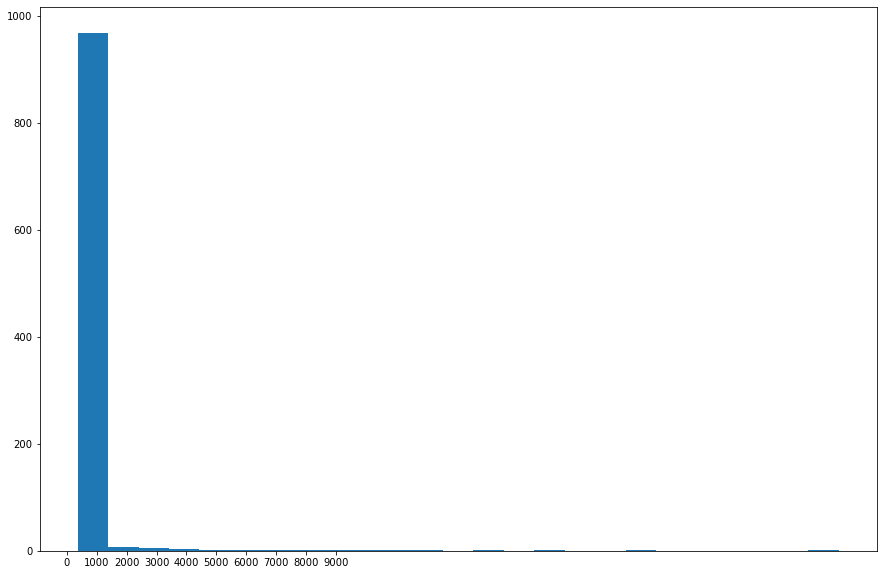

363

In [30]:
"""
Now let's look at the distribution of positive net_entry counts
Decided to generate my  own cumlative distribution data with parameters I can set.
I then plot with matplot lib to look at distribution of net_entries
We see that by far most of the net_entry counts are below 3000
"""
cum_count = []
for i in range(0, 10000, 10):
    cum_count.append(df[df.net_ent > i].count()[0])

print(cum_count)
# plt.figure(figsize = (20, 25), dpi = 60)
# sns.displot(cum_count, bins = 10)
# plt.show()

f, axs = plt.subplots(1,1, figsize = (15, 10))
plt.xticks(range(0, 10000, 1000))
axs.hist(cum_count, bins = 25)
plt.show()

df[df.net_ent > 7500].count()[0]

In [31]:
"""
Another way to analyze a cut-off for net_entry outliers:
If I assume that the maximum number of persons that can pass through a turnstile is one every two seconds,
this translates to 7200 per 4hr interval. 
Based on the histogram above and the anaysis of max persons through a turnstile, I believe 7500 is a 
reasonable and conservative cut-off for assuming that any number above 7500 is not credible and should 
be discarded. Similarly, and negative entries <7500 are not reasonable even if we assume the the negative is
a counter reversal errror.
"""


mask_outliers = ((df.net_ent < -7500)
        |(df.net_ent > 7500)
       )
df[mask_outliers]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
42,A043,R462,00-00-01,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,355867122,441441081,2021-11-20 00:00:00,5,Saturday,371842862.0,456824078.0,-15975740.0,-15382997.0
84,A043,R462,00-00-02,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,14684297,14168391,2021-11-20 00:00:00,5,Saturday,355870199.0,441449680.0,-341185902.0,-427281289.0
126,A043,R462,00-03-00,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,5776639,4129855,2021-11-20 00:00:00,5,Saturday,14689036.0,14177069.0,-8912397.0,-10047214.0
168,A043,R462,00-03-01,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,5376748,1846164,2021-11-20 00:00:00,5,Saturday,5779664.0,4133174.0,-402916.0,-2287010.0
210,A043,R462,00-03-02,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,4385797,1962529,2021-11-20 00:00:00,5,Saturday,5379000.0,1847519.0,-993203.0,115010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31484,R119,R320,00-00-01,CANAL ST,1,09/01/2021,04:00:00,REGULAR,10018607,3788056,2021-09-01 04:00:00,2,Wednesday,1906581.0,788437.0,8112026.0,2999619.0
31525,R119,R320,00-00-02,CANAL ST,1,09/01/2021,04:00:00,REGULAR,446097,167673,2021-09-01 04:00:00,2,Wednesday,10019231.0,3788415.0,-9573134.0,-3620742.0
31566,R120,R320,01-00-00,CANAL ST,1,09/01/2021,04:00:00,REGULAR,46249,269491,2021-09-01 04:00:00,2,Wednesday,447466.0,168277.0,-401217.0,101214.0
31608,R120,R320,01-00-01,CANAL ST,1,09/01/2021,20:00:00,REGULAR,21,24,2021-09-01 20:00:00,2,Wednesday,46500.0,271511.0,-46479.0,-271487.0


In [32]:
"""
Looking at outliers with various groupings in the next few cells
The problem is mostly time 00:00:00 mostly on Saturday as with in 2019

"""


df[mask_outliers].groupby('TIME').count()

,CA,UNIT,SCP,STATION,LINENAME,DATE,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
TIME,,,,,,,,,,,,,,,,
00:00:00,645,645,645,645,645,645,645,645,645,645,645,645,645,645,645,645
04:00:00,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94,94
20:00:00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [33]:
df[mask_outliers].groupby(['day_name', 'TIME']).count()

CA  UNIT  SCP  STATION  LINENAME  DATE  DESC  ENTRIES  \
day_name  TIME                                                               
Saturday  00:00:00  645   645  645      645       645   645   645      645   
          04:00:00   38    38   38       38        38    38    38       38   
Wednesday 04:00:00   56    56   56       56        56    56    56       56   
          20:00:00    1     1    1        1         1     1     1        1   

                    EXITS  date_time  day_num  prev_ent  prev_ex  net_ent  \
day_name  TIME                                                              
Saturday  00:00:00    645        645      645       645      645      645   
          04:00:00     38         38       38        38       38       38   
Wednesday 04:00:00     56         56       56        56       56       56   
          20:00:00      1          1        1         1        1        1   

                    net_ex  
day_name  TIME              
Saturday  00:00:00     645  
          04:00:00      38  
Wednesday 04:00:00      56  
          20:00:00       1

In [34]:
df[mask_outliers].groupby('LINENAME').count()

,CA,UNIT,SCP,STATION,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
LINENAME,,,,,,,,,,,,,,,,
1,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78
ACE,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247,247
JNQRZ6W,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415,415


In [35]:
"""
dropping all rows with net_entry < -7500 or >7500
"""

df.drop(df[mask_outliers].index, inplace = True)


In [36]:
df[mask_outliers].count()

<ipython-input-36-93447ec5f762>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[mask_outliers].count()


CA           0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
date_time    0
day_num      0
day_name     0
prev_ent     0
prev_ex      0
net_ent      0
net_ex       0
dtype: int64

In [37]:
mask = ((df['day_name'] == 'Saturday')
       & (df['TIME'] == '00:00:00')
       )
df[mask]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
840,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,0,709,2021-11-20,5,Saturday,74.0,6.0,-74.0,703.0
3275,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/13/2021,00:00:00,REGULAR,0,668,2021-11-13,5,Saturday,30.0,6.0,-30.0,662.0
5711,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/06/2021,00:00:00,REGULAR,0,637,2021-11-06,5,Saturday,18.0,6.0,-18.0,631.0
8144,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/30/2021,00:00:00,REGULAR,0,626,2021-10-30,5,Saturday,6.0,6.0,-6.0,620.0
10559,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/23/2021,00:00:00,REGULAR,0,583,2021-10-23,5,Saturday,4.0,6.0,-4.0,577.0
12981,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/16/2021,00:00:00,REGULAR,0,583,2021-10-16,5,Saturday,1029.0,0.0,-1029.0,583.0
15411,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/09/2021,00:00:00,REGULAR,0,583,2021-10-09,5,Saturday,1029.0,0.0,-1029.0,583.0
17846,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/02/2021,00:00:00,REGULAR,0,582,2021-10-02,5,Saturday,1029.0,0.0,-1029.0,582.0
20282,A046,R463,00-05-03,CANAL ST,JNQRZ6W,09/25/2021,00:00:00,REGULAR,0,582,2021-09-25,5,Saturday,1028.0,0.0,-1028.0,582.0
22708,A046,R463,00-05-03,CANAL ST,JNQRZ6W,09/18/2021,00:00:00,REGULAR,0,578,2021-09-18,5,Saturday,1028.0,0.0,-1028.0,578.0


In [38]:
"""
Again checking for negative net_entry
Checking for how many negative entries and what percentage of all data and by line
Still 541 negative net entries, all from line JNQRZ6W
Negative net entries from the other lines where all outlier data
"""

all_neg = df[df.net_ent < 0]
print(f'all negative entries {all_neg.shape[0]}')
print(f'all entries {df.shape[0]}')
print(f'negs as percent of all entries {all_neg.shape[0] / df.shape[0] * 100}')
print('------------------------\n')

mask_allnegs_linej = ((df['LINENAME'] == 'JNQRZ6W') 
                       & (df["ENTRIES"] < df["prev_ent"])
                      )

all_linej = df[df['LINENAME'] == 'JNQRZ6W']
print(f'all negative entries Line JNQRZ6W {df[mask_allnegs_linej].shape[0]}')
print(f'all entries Line JNQRZ6W {all_linej.shape[0]}')
print(f'negs as percent of all entries Line JNQRZ6W  {df[mask_allnegs_linej].shape[0] / all_linej.shape[0] * 100}')
print('------------------------\n')




mask_allnegs_lineACE = ((df['LINENAME'] == 'ACE') 
                       & (df["ENTRIES"] < df["prev_ent"])
                      )


all_lineACE = df[df['LINENAME'] == 'ACE']
print(f'all negative entries Line ACE {df[mask_allnegs_lineACE].shape[0]}')
print(f'all entries Line ACE{all_lineACE.shape[0]}')
print(f'negs as percent of all entries Line ACE  {df[mask_allnegs_lineACE].shape[0] / all_lineACE.shape[0] * 100}')
print('------------------------\n')


mask_allnegs_line1 = ((df['LINENAME'] == '1') 
                       & (df["ENTRIES"] < df["prev_ent"])
                      )


all_line1 = df[df['LINENAME'] == '1']
print(f'all negative entries Line 1 {df[mask_allnegs_line1].shape[0]}')
print(f'all entries Line 1 {all_line1.shape[0]}')
print(f'negs as percent of all entries Line 1  {df[mask_allnegs_line1].shape[0] / all_line1.shape[0] * 100}')
print('------------------------\n')



all negative entries 516
all entries 29439
negs as percent of all entries 1.7527769285641495
------------------------

all negative entries Line JNQRZ6W 516
all entries Line JNQRZ6W 16741
negs as percent of all entries Line JNQRZ6W  3.0822531509467774
------------------------

all negative entries Line ACE 0
all entries Line ACE9661
negs as percent of all entries Line ACE  0.0
------------------------

all negative entries Line 1 0
all entries Line 1 3037
negs as percent of all entries Line 1  0.0
------------------------



In [39]:
"""
Some of these negative net entries appear when there are 0 entries.
Let's take a closer look 
"""
all_neg.sort_values('net_ent')


,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
11011,A066,R118,00-00-00,CANAL ST,JNQRZ6W,10/29/2021,04:00:00,REGULAR,1722474375,1763976349,2021-10-29 04:00:00,4,Friday,1.722476e+09,1.763975e+09,-1376.0,1114.0
3724,A066,R118,00-00-00,CANAL ST,JNQRZ6W,11/17/2021,20:00:00,REGULAR,1722446054,1764004348,2021-11-17 20:00:00,2,Wednesday,1.722447e+09,1.764004e+09,-1054.0,368.0
15411,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/09/2021,00:00:00,REGULAR,0,583,2021-10-09 00:00:00,5,Saturday,1.029000e+03,0.000000e+00,-1029.0,583.0
17846,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/02/2021,00:00:00,REGULAR,0,582,2021-10-02 00:00:00,5,Saturday,1.029000e+03,0.000000e+00,-1029.0,582.0
12981,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/16/2021,00:00:00,REGULAR,0,583,2021-10-16 00:00:00,5,Saturday,1.029000e+03,0.000000e+00,-1029.0,583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10997,A066,R118,00-00-00,CANAL ST,JNQRZ6W,10/26/2021,04:00:00,REGULAR,1722478406,1763972614,2021-10-26 04:00:00,1,Tuesday,1.722478e+09,1.763973e+09,-2.0,15.0
25587,A066,R118,00-00-00,CANAL ST,JNQRZ6W,09/13/2021,04:00:00,REGULAR,1722538519,1763908089,2021-09-13 04:00:00,0,Monday,1.722539e+09,1.763908e+09,-2.0,22.0
20715,A066,R118,00-00-00,CANAL ST,JNQRZ6W,09/27/2021,04:00:00,REGULAR,1722519118,1763929298,2021-09-27 04:00:00,0,Monday,1.722519e+09,1.763929e+09,-2.0,19.0
18285,A066,R118,00-00-00,CANAL ST,JNQRZ6W,10/05/2021,04:00:00,REGULAR,1722508550,1763939201,2021-10-05 04:00:00,1,Tuesday,1.722509e+09,1.763939e+09,-1.0,21.0


In [40]:
"""
All 0 entries are from the same CA -UNIT- SCP at time 00:00:00 over multiple Saturdays
So clearly some sort of malfunction.
Let's drop these from the dataframe.
"""

all_neg[all_neg.ENTRIES == 0]

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex
840,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/20/2021,00:00:00,REGULAR,0,709,2021-11-20 00:00:00,5,Saturday,74.0,6.0,-74.0,703.0
3275,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/13/2021,00:00:00,REGULAR,0,668,2021-11-13 00:00:00,5,Saturday,30.0,6.0,-30.0,662.0
5711,A046,R463,00-05-03,CANAL ST,JNQRZ6W,11/06/2021,00:00:00,REGULAR,0,637,2021-11-06 00:00:00,5,Saturday,18.0,6.0,-18.0,631.0
8144,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/30/2021,00:00:00,REGULAR,0,626,2021-10-30 00:00:00,5,Saturday,6.0,6.0,-6.0,620.0
10559,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/23/2021,00:00:00,REGULAR,0,583,2021-10-23 00:00:00,5,Saturday,4.0,6.0,-4.0,577.0
12981,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/16/2021,00:00:00,REGULAR,0,583,2021-10-16 00:00:00,5,Saturday,1029.0,0.0,-1029.0,583.0
15411,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/09/2021,00:00:00,REGULAR,0,583,2021-10-09 00:00:00,5,Saturday,1029.0,0.0,-1029.0,583.0
17846,A046,R463,00-05-03,CANAL ST,JNQRZ6W,10/02/2021,00:00:00,REGULAR,0,582,2021-10-02 00:00:00,5,Saturday,1029.0,0.0,-1029.0,582.0
20282,A046,R463,00-05-03,CANAL ST,JNQRZ6W,09/25/2021,00:00:00,REGULAR,0,582,2021-09-25 00:00:00,5,Saturday,1028.0,0.0,-1028.0,582.0
22708,A046,R463,00-05-03,CANAL ST,JNQRZ6W,09/18/2021,00:00:00,REGULAR,0,578,2021-09-18 00:00:00,5,Saturday,1028.0,0.0,-1028.0,578.0


In [41]:
"""
dropping all 0 entry rows as per explanation in cell above
"""


mask = ((df.LINENAME == 'JNQRZ6W')
        &(df.CA == 'A046')
        &(df.UNIT == 'R463')
        &(df.SCP == '00-05-03')
        &(df.ENTRIES == 0)
        &(df.TIME == '00:00:00')
        &(df.net_ent < 0)
        
       )
df.drop(df[mask].index, inplace = True)

In [42]:
"""
recalc all_neg and examine.
Almost all remaining negative net entries are from the same CA -UNIT- SCP unit
"""
all_neg = df[df.net_ent < 0]
all_neg.groupby(['CA','UNIT','SCP','LINENAME']).count()


STATION  DATE  TIME  DESC  ENTRIES  EXITS  \
CA   UNIT SCP      LINENAME                                              
A046 R463 00-05-02 JNQRZ6W         1     1     1     1        1      1   
          00-05-03 JNQRZ6W         1     1     1     1        1      1   
A066 R118 00-00-00 JNQRZ6W       502   502   502   502      502    502   

                             date_time  day_num  day_name  prev_ent  prev_ex  \
CA   UNIT SCP      LINENAME                                                    
A046 R463 00-05-02 JNQRZ6W           1        1         1         1        1   
          00-05-03 JNQRZ6W           1        1         1         1        1   
A066 R118 00-00-00 JNQRZ6W         502      502       502       502      502   

                             net_ent  net_ex  
CA   UNIT SCP      LINENAME                   
A046 R463 00-05-02 JNQRZ6W         1       1  
          00-05-03 JNQRZ6W         1       1  
A066 R118 00-00-00 JNQRZ6W       502     502

In [43]:
"""
Examining the remaining negative entries, by count and summation, the data is spread over a number of days
and time intervals. Other than being negative, the numbers look reasonable
"""

all_neg.groupby(['CA','UNIT','SCP','LINENAME','date_time']).count().sort_values('net_ent')
# all_neg.groupby(['CA','UNIT','SCP','LINENAME','date_time']).sum().sort_values('net_ent')

STATION  DATE  TIME  DESC  \
CA   UNIT SCP      LINENAME date_time                                        
A046 R463 00-05-02 JNQRZ6W  2021-10-29 16:00:00        1     1     1     1   
A066 R118 00-00-00 JNQRZ6W  2021-10-30 08:00:00        1     1     1     1   
                            2021-10-30 04:00:00        1     1     1     1   
                            2021-10-29 20:00:00        1     1     1     1   
                            2021-10-29 16:00:00        1     1     1     1   
...                                                  ...   ...   ...   ...   
                            2021-09-28 16:00:00        1     1     1     1   
                            2021-09-28 12:00:00        1     1     1     1   
                            2021-09-28 08:00:00        1     1     1     1   
                            2021-09-30 12:00:00        1     1     1     1   
                            2021-09-14 08:00:00        2     2     2     2   

                                                 ENTRIES  EXITS  day_num  \
CA   UNIT SCP      LINENAME date_time                                      
A046 R463 00-05-02 JNQRZ6W  2021-10-29 16:00:00        1      1        1   
A066 R118 00-00-00 JNQRZ6W  2021-10-30 08:00:00        1      1        1   
                            2021-10-30 04:00:00        1      1        1   
                            2021-10-29 20:00:00        1      1        1   
                            2021-10-29 16:00:00        1      1        1   
...                                                  ...    ...      ...   
                            2021-09-28 16:00:00        1      1        1   
                            2021-09-28 12:00:00        1      1        1   
                            2021-09-28 08:00:00        1      1        1   
                            2021-09-30 12:00:00        1      1        1   
                            2021-09-14 08:00:00        2      2        2   

                                                 day_name  prev_ent  prev_ex  \
CA   UNIT SCP      LINENAME date_time                                          
A046 R463 00-05-02 JNQRZ6W  2021-10-29 16:00:00         1         1        1   
A066 R118 00-00-00 JNQRZ6W  2021-10-30 08:00:00         1         1        1   
                            2021-10-30 04:00:00         1         1        1   
                            2021-10-29 20:00:00         1         1        1   
                            2021-10-29 16:00:00         1         1        1   
...                                                   ...       ...      ...   
                            2021-09-28 16:00:00         1         1        1   
                            2021-09-28 12:00:00         1         1        1   
                            2021-09-28 08:00:00         1         1        1   
                            2021-09-30 12:00:00         1         1        1   
                            2021-09-14 08:00:00         2         2        2   

                                                 net_ent  net_ex  
CA   UNIT SCP      LINENAME date_time                             
A046 R463 00-05-02 JNQRZ6W  2021-10-29 16:00:00        1       1  
A066 R118 00-00-00 JNQRZ6W  2021-10-30 08:00:00        1       1  
                            2021-10-30 04:00:00        1       1  
                            2021-10-29 20:00:00        1       1  
                            2021-10-29 16:00:00        1       1  
...                                                  ...     ...  
                            2021-09-28 16:00:00        1       1  
                            2021-09-28 12:00:00        1       1  
                            2021-09-28 08:00:00        1       1  
                            2021-09-30 12:00:00        1       1  
                            2021-09-14 08:00:00        2       2  

[503 rows x 12 columns]

In [44]:
"""
Based on the examinations above and the stats here, other than being negative, the net entry
numbers look reasonable. I am going to assume that these negative entries are a result of counter reversal
and will change the net entry value to positive
"""

all_neg.describe()

,ENTRIES,EXITS,day_num,prev_ent,prev_ex,net_ent,net_ex
count,5.040000e+02,5.040000e+02,504.000000,5.040000e+02,5.040000e+02,504.000000,504.000000
mean,1.715659e+09,1.756955e+09,2.960317,1.715659e+09,1.756954e+09,-231.128968,243.176587
std,1.083990e+08,1.110082e+08,1.978616,1.083990e+08,1.110082e+08,234.828209,168.153540
min,0.000000e+00,6.000000e+00,0.000000,1.024000e+03,0.000000e+00,-1376.000000,6.000000
25%,1.722464e+09,1.763923e+09,1.000000,1.722465e+09,1.763923e+09,-405.500000,89.000000
50%,1.722496e+09,1.763954e+09,3.000000,1.722496e+09,1.763953e+09,-146.500000,261.000000
75%,1.722525e+09,1.763986e+09,5.000000,1.722525e+09,1.763986e+09,-34.000000,381.250000
max,1.722549e+09,1.764018e+09,6.000000,1.722549e+09,1.764018e+09,-1.000000,1114.000000


In [45]:
"""
Based on analysis in cells above, converting all remaining negative net entries to positive value
"""

df['net_ent'] = np.where(df['net_ent'] < 0,df['net_ent']*-1 ,df['net_ent'])


In [46]:
"""
Check for negative net entries again. 
None remain...hurrah!

"""
df[df.net_ent < 0].count()

CA           0
UNIT         0
SCP          0
STATION      0
LINENAME     0
DATE         0
TIME         0
DESC         0
ENTRIES      0
EXITS        0
date_time    0
day_num      0
day_name     0
prev_ent     0
prev_ex      0
net_ent      0
net_ex       0
dtype: int64

In [47]:
"""
Performing same analysis as above for net_exits.
There are none. 
"""

df[df.net_ex < 0].shape

(0, 17)

In [48]:
"""
Just a look to see if there are any net exit anomalies.
There are none.
"""


df[df.net_ex > 7500].count()[0]
df[df.net_ex < -7500].count()[0]

0

In [49]:
"""
Now I'm checking for days when then there were 0 entries with summation and count.
All zero entries are from the same line name and CA -UNIT- SCP, spread over weeks and
all time intervals. A reasonable assumption is that this turnstile(s), where blocked
or closed off and not being used. The net entries are zero confirming a closure of some sort.

So these rows should be dropped
"""

zero_ent = df[df.ENTRIES == 0]

# zero_ent.groupby(['CA','UNIT','SCP','LINENAME','date_time']).count()
zero_ent.groupby(['CA','UNIT','SCP','LINENAME','date_time']).sum().sort_values('net_ent')



ENTRIES  EXITS  day_num  \
CA   UNIT SCP      LINENAME date_time                                      
A046 R463 00-05-03 JNQRZ6W  2021-10-14 08:00:00        0    583        3   
                            2021-10-30 08:00:00        0    626        5   
                            2021-10-30 04:00:00        0    626        5   
                            2021-10-29 20:00:00        0    626        4   
                            2021-10-29 16:00:00        0    623        4   
...                                                  ...    ...      ...   
                            2021-09-28 20:00:00        0    582        1   
                            2021-09-28 16:00:00        0    582        1   
                            2021-09-28 12:00:00        0    582        1   
                            2021-09-30 16:00:00        0    582        3   
                            2021-09-01 04:00:00        0    578        2   

                                                 prev_ent  prev_ex  net_ent  \
CA   UNIT SCP      LINENAME date_time                                         
A046 R463 00-05-03 JNQRZ6W  2021-10-14 08:00:00       0.0    583.0      0.0   
                            2021-10-30 08:00:00       0.0    626.0      0.0   
                            2021-10-30 04:00:00       0.0    626.0      0.0   
                            2021-10-29 20:00:00       0.0    623.0      0.0   
                            2021-10-29 16:00:00       0.0    601.0      0.0   
...                                                   ...      ...      ...   
                            2021-09-28 20:00:00       0.0    582.0      0.0   
                            2021-09-28 16:00:00       0.0    582.0      0.0   
                            2021-09-28 12:00:00       0.0    582.0      0.0   
                            2021-09-30 16:00:00       0.0    582.0      0.0   
                            2021-09-01 04:00:00    1024.0      0.0   1024.0   

                                                 net_ex  
CA   UNIT SCP      LINENAME date_time                    
A046 R463 00-05-03 JNQRZ6W  2021-10-14 08:00:00     0.0  
                            2021-10-30 08:00:00     0.0  
                            2021-10-30 04:00:00     0.0  
                            2021-10-29 20:00:00     3.0  
                            2021-10-29 16:00:00    22.0  
...                                                 ...  
                            2021-09-28 20:00:00     0.0  
                            2021-09-28 16:00:00     0.0  
                            2021-09-28 12:00:00     0.0  
                            2021-09-30 16:00:00     0.0  
                            2021-09-01 04:00:00   578.0  

[507 rows x 7 columns]

In [50]:
"""
Dropping zero entry rows as per analysis above
"""

df.drop(df[df.ENTRIES == 0].index, inplace = True)

In [51]:
"""
Performing the same analysis as above for days with 0 exits.
It again appears all 0 exits are associated with the JNQRZ6W and the same R463 unit
Almost zero net entries or exits

drop these rows
"""

zero_exit = df[df.EXITS == 0]
zero_exit.groupby(['CA','UNIT','SCP','LINENAME','date_time']).count()
zero_exit.groupby(['CA','UNIT','SCP','LINENAME','date_time']).sum()




ENTRIES  EXITS  day_num  \
CA   UNIT SCP      LINENAME date_time                                      
A046 R463 00-05-00 JNQRZ6W  2021-09-01 08:00:00     4393      0        2   
                            2021-09-01 12:00:00     4393      0        2   
                            2021-09-01 16:00:00     4393      0        2   
                            2021-09-01 20:00:00     4393      0        2   
                            2021-09-02 00:00:00     4393      0        3   
...                                                  ...    ...      ...   
          00-05-02 JNQRZ6W  2021-10-28 00:00:00     1029      0        3   
                            2021-10-28 04:00:00     1029      0        3   
                            2021-10-28 08:00:00     1029      0        3   
                            2021-10-29 00:00:00     1030      0        4   
                            2021-10-29 04:00:00     1031      0        4   

                                                 prev_ent  prev_ex  net_ent  \
CA   UNIT SCP      LINENAME date_time                                         
A046 R463 00-05-00 JNQRZ6W  2021-09-01 08:00:00    4393.0      0.0      0.0   
                            2021-09-01 12:00:00    4393.0      0.0      0.0   
                            2021-09-01 16:00:00    4393.0      0.0      0.0   
                            2021-09-01 20:00:00    4393.0      0.0      0.0   
                            2021-09-02 00:00:00    4393.0      0.0      0.0   
...                                                   ...      ...      ...   
          00-05-02 JNQRZ6W  2021-10-28 00:00:00    1029.0      0.0      0.0   
                            2021-10-28 04:00:00    1029.0      0.0      0.0   
                            2021-10-28 08:00:00    1029.0      0.0      0.0   
                            2021-10-29 00:00:00    1029.0      0.0      1.0   
                            2021-10-29 04:00:00    1030.0      0.0      1.0   

                                                 net_ex  
CA   UNIT SCP      LINENAME date_time                    
A046 R463 00-05-00 JNQRZ6W  2021-09-01 08:00:00     0.0  
                            2021-09-01 12:00:00     0.0  
                            2021-09-01 16:00:00     0.0  
                            2021-09-01 20:00:00     0.0  
                            2021-09-02 00:00:00     0.0  
...                                                 ...  
          00-05-02 JNQRZ6W  2021-10-28 00:00:00     0.0  
                            2021-10-28 04:00:00     0.0  
                            2021-10-28 08:00:00     0.0  
                            2021-10-29 00:00:00     0.0  
                            2021-10-29 04:00:00     0.0  

[844 rows x 7 columns]

In [52]:
"""
Drop zero exit rows as per above analysis
"""

df.drop(df[df.EXITS == 0].index, inplace = True)

In [53]:
"""
Just a check to make sure all zero entries and exits have been dropped

"""

print(df[df.EXITS == 0], df[df.ENTRIES == 0])

Empty DataFrame
Columns: [CA, UNIT, SCP, STATION, LINENAME, DATE, TIME, DESC, ENTRIES, EXITS, date_time, day_num, day_name, prev_ent, prev_ex, net_ent, net_ex]
Index: [] Empty DataFrame
Columns: [CA, UNIT, SCP, STATION, LINENAME, DATE, TIME, DESC, ENTRIES, EXITS, date_time, day_num, day_name, prev_ent, prev_ex, net_ent, net_ex]
Index: []


In [54]:
""" 
Add columns:
> calculate net_entry + net_exit. This is a good proxy for total traffic around the station
> calculate net_entry - net_exit. This is an indication of traffic direction and perhaps a hint at demographics
"""

df['n_ent + n_ex'] = df.net_ent + df.net_ex
df['n_ent - n_ex'] = df.net_ent - df.net_ex

# df['day_num'] = df['date_time'].dt.dayofweek
# df['day_name'] = df['date_time'].dt.day_name()


df

,CA,UNIT,SCP,STATION,LINENAME,DATE,TIME,DESC,ENTRIES,EXITS,date_time,day_num,day_name,prev_ent,prev_ex,net_ent,net_ex,n_ent + n_ex,n_ent - n_ex
1,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,04:00:00,REGULAR,371839605,456817005,2021-11-20 04:00:00,5,Saturday,371839594.0,456816992.0,11.0,13.0,24.0,-2.0
2,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,08:00:00,REGULAR,371839607,456817045,2021-11-20 08:00:00,5,Saturday,371839605.0,456817005.0,2.0,40.0,42.0,-38.0
3,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,12:00:00,REGULAR,371839631,456817335,2021-11-20 12:00:00,5,Saturday,371839607.0,456817045.0,24.0,290.0,314.0,-266.0
4,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,16:00:00,REGULAR,371839755,456817752,2021-11-20 16:00:00,5,Saturday,371839631.0,456817335.0,124.0,417.0,541.0,-293.0
5,A043,R462,00-00-00,CANAL ST,JNQRZ6W,11/20/2021,20:00:00,REGULAR,371839985,456818112,2021-11-20 20:00:00,5,Saturday,371839755.0,456817752.0,230.0,360.0,590.0,-130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31658,R120,R320,01-00-02,CANAL ST,1,09/03/2021,04:00:00,REGULAR,1481800,8365661,2021-09-03 04:00:00,4,Friday,1481800.0,8365655.0,0.0,6.0,6.0,-6.0
31659,R120,R320,01-00-02,CANAL ST,1,09/03/2021,08:00:00,REGULAR,1481803,8365771,2021-09-03 08:00:00,4,Friday,1481800.0,8365661.0,3.0,110.0,113.0,-107.0
31660,R120,R320,01-00-02,CANAL ST,1,09/03/2021,12:00:00,REGULAR,1481813,8365850,2021-09-03 12:00:00,4,Friday,1481803.0,8365771.0,10.0,79.0,89.0,-69.0
31661,R120,R320,01-00-02,CANAL ST,1,09/03/2021,16:00:00,REGULAR,1481827,8365945,2021-09-03 16:00:00,4,Friday,1481813.0,8365850.0,14.0,95.0,109.0,-81.0


In [55]:

"""
Based on some of the analysis above, I noticed that unique combinations of turnstile identifyers CA, UNIT,
SCP are associated with a single line name. The code below confirms that this is the case. I loop over the 
dataframe, isolating each line name at this station, then generate a string combination of CA, UNIT,
SCP for each row and store that in a set for that line name. 

I end up with a set, for each line name of unique combinations of CA, UNIT, and SCP. I then check for 
intersections  between these sets which are empty. so this tells me that I can isolate traffic data by line
name and time interval. When I look at a NYC subway map, the line names cleary match up to different entrances
of the Canal st. complex. So this allows me to analyze data based on time intervals as small as 4 hours
by enterance/line. This is a very good start at micro targeting advertising.
"""



stiles_id_ace = set()
stiles_id_j = set()
stiles_id_1 = set()

for row in df.itertuples(index = True):
    if (row.LINENAME == 'ACE'):
        stiles_id_ace.add(getattr(row, "CA") +  getattr(row, "UNIT") + getattr(row, "SCP") )
print(stiles_id_ace)
print('-'*30 + '\n')

for row in df.itertuples(index = True):
    if (row.LINENAME == 'JNQRZ6W'):
        stiles_id_j.add(getattr(row, "CA") +  getattr(row, "UNIT") + getattr(row, "SCP") )
print(stiles_id_j)
print('-'*30 + '\n')

for row in df.itertuples(index = True):
    if (row.LINENAME == '1'):
        stiles_id_1.add(getattr(row, "CA") +  getattr(row, "UNIT") + getattr(row, "SCP") )
print(stiles_id_1)
print('-'*30 + '\n')


print(stiles_id_ace.intersection(stiles_id_j))
print(stiles_id_ace.intersection(stiles_id_1))
print(stiles_id_j.intersection(stiles_id_1))


{'N090R13901-05-00', 'N089R13900-06-00', 'N089R13900-04-02', 'N090R13901-06-00', 'N089R13900-04-00', 'N089R13900-03-00', 'N089R13900-00-02', 'N089R13900-00-01', 'N089R13900-00-00', 'N090R13901-00-00', 'N089R13900-03-02', 'N089R13900-03-01', 'N090R13901-00-01', 'N090R13901-03-00', 'N089R13900-04-01', 'N090R13901-00-02', 'N089R13900-06-01', 'N090R13901-06-01', 'N089R13900-06-02'}
------------------------------

{'A046R46300-06-06', 'A043R46200-03-02', 'A046R46300-03-00', 'A043R46200-00-00', 'A046R46300-06-05', 'A046R46300-06-02', 'A046R46300-00-00', 'A046R46300-05-01', 'A066R11800-00-02', 'A043R46200-03-00', 'A043R46200-00-01', 'A046R46300-06-01', 'A046R46300-06-03', 'A043R46200-03-04', 'A043R46200-06-01', 'A046R46300-06-08', 'A043R46200-03-03', 'A046R46300-06-07', 'A043R46200-06-02', 'A046R46300-00-01', 'A046R46300-00-03', 'A046R46300-03-01', 'A046R46300-00-02', 'A046R46300-06-00', 'A046R46300-06-04', 'A043R46200-03-01', 'A043R46200-00-02', 'A066R11800-00-01', 'A043R46200-06-00', 'A046R

In [56]:
df.groupby(['LINENAME', 'DATE', 'TIME']).agg({'net_ent':'sum', 'net_ex':'sum','n_ent + n_ex': 'sum'})

net_ent  net_ex  n_ent + n_ex
LINENAME DATE       TIME                                   
1        09/01/2021 08:00:00    104.0   501.0         605.0
                    12:00:00    196.0   501.0         697.0
                    16:00:00    460.0   399.0         859.0
                    20:00:00    460.0   287.0         747.0
         09/02/2021 00:00:00     28.0    53.0          81.0
...                               ...     ...           ...
JNQRZ6W  11/26/2021 04:00:00    100.0   188.0         288.0
                    08:00:00    185.0   902.0        1087.0
                    12:00:00   1389.0  5564.0        6953.0
                    16:00:00   5543.0  8270.0       13813.0
                    20:00:00   7205.0  5561.0       12766.0

[1504 rows x 3 columns]

In [57]:
"""
Next few cells are just exploratory plots

"""

mask = ((df['LINENAME'] == 'ACE') &
        ((df['DATE'] == '10/01/2021')) 
       )
df[mask]

df_ace = (df[mask])

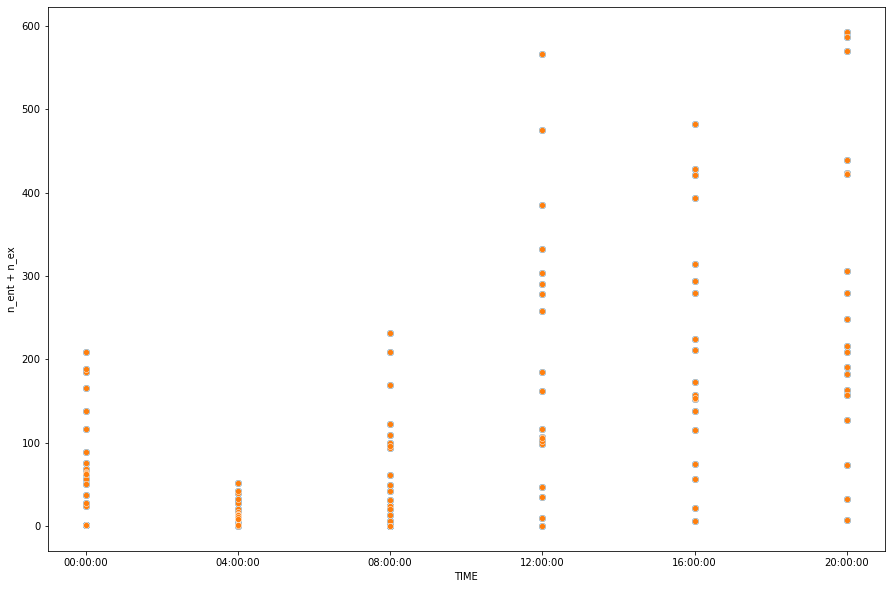

In [58]:
f, axs = plt.subplots(1,1, figsize = (15, 10))
axs.scatter(df_ace.TIME, df_ace['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace, x = "TIME", y= df_ace["n_ent + n_ex"])
plt.show()


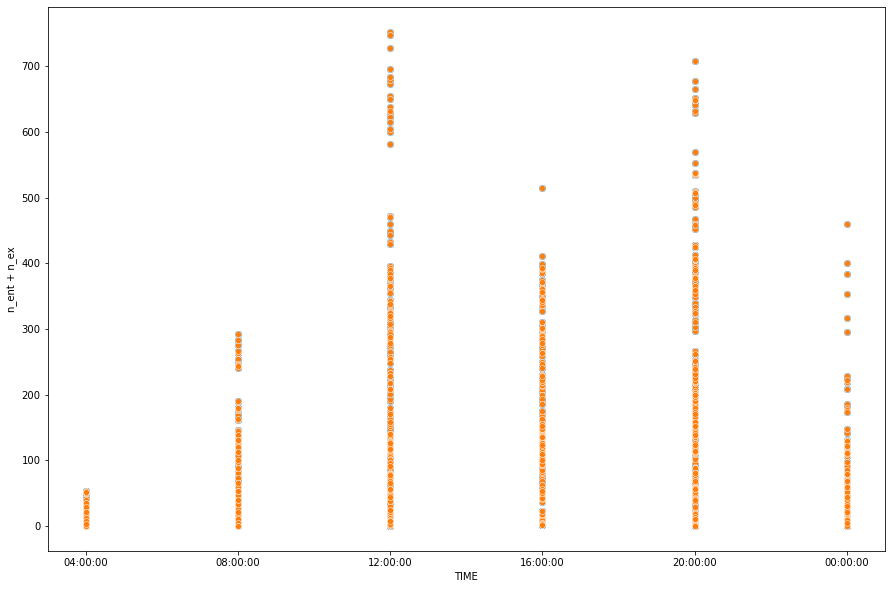

In [59]:
mask2 = ((df['LINENAME'] == 'ACE') &
        ((df['day_name'] == 'Monday')) 
       )
df[mask2]

df_ace2 = (df[mask2])


f, axs = plt.subplots(1,1, figsize = (15, 10))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
plt.show()

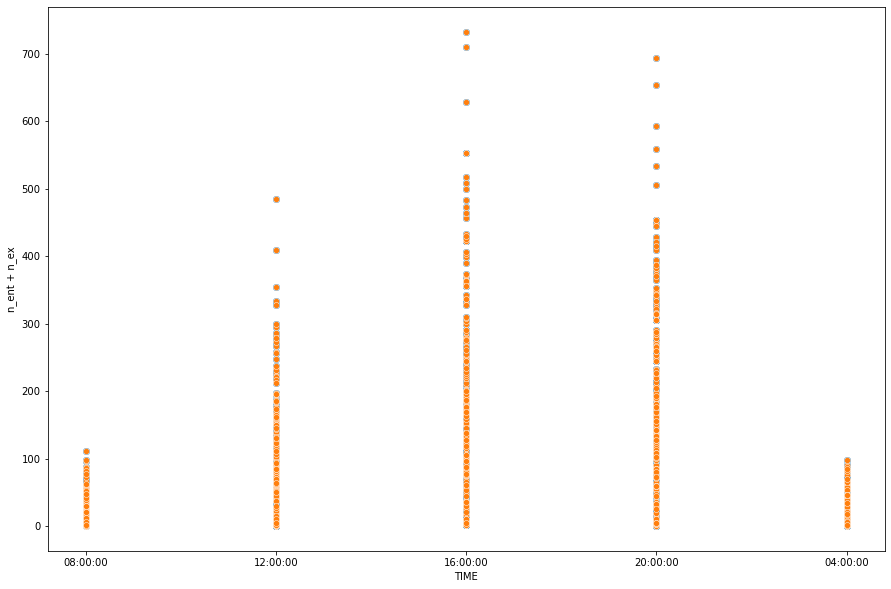

In [60]:
mask2 = ((df['LINENAME'] == 'ACE') &
        ((df['day_name'] == 'Saturday')) 
       )
df[mask2]

df_ace2 = (df[mask2])

f, axs = plt.subplots(1,1, figsize = (15, 10))
# plt.xticks(range(0, 10000, 500))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
# axs.hist(df_ace['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
# axs =sns.pairplot(df_ace)
plt.show()

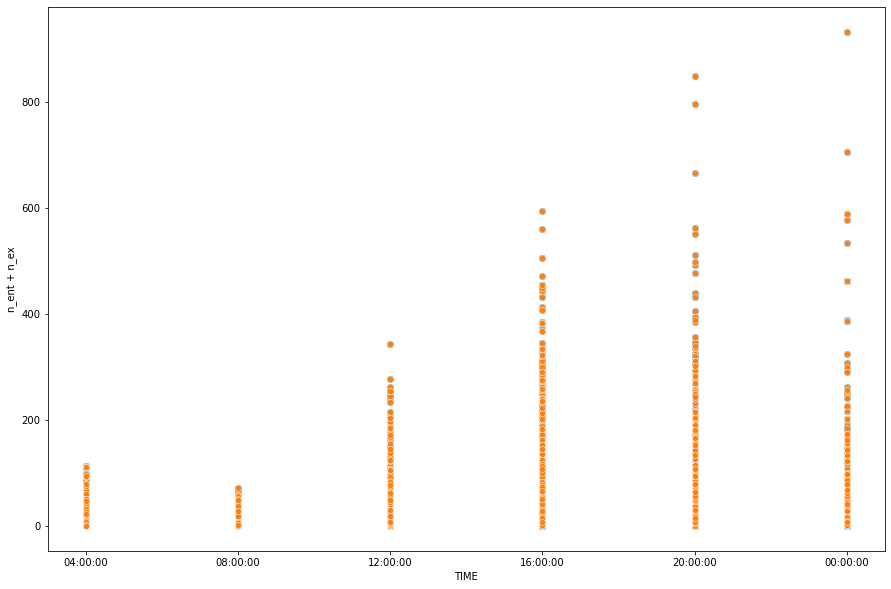

In [61]:
mask2 = ((df['LINENAME'] == 'ACE') &
        ((df['day_name'] == 'Sunday')) 
       )
df[mask2]

df_ace2 = (df[mask2])

f, axs = plt.subplots(1,1, figsize = (15, 10))
# plt.xticks(range(0, 10000, 500))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
# axs.hist(df_ace['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
# axs =sns.pairplot(df_ace)
plt.show()

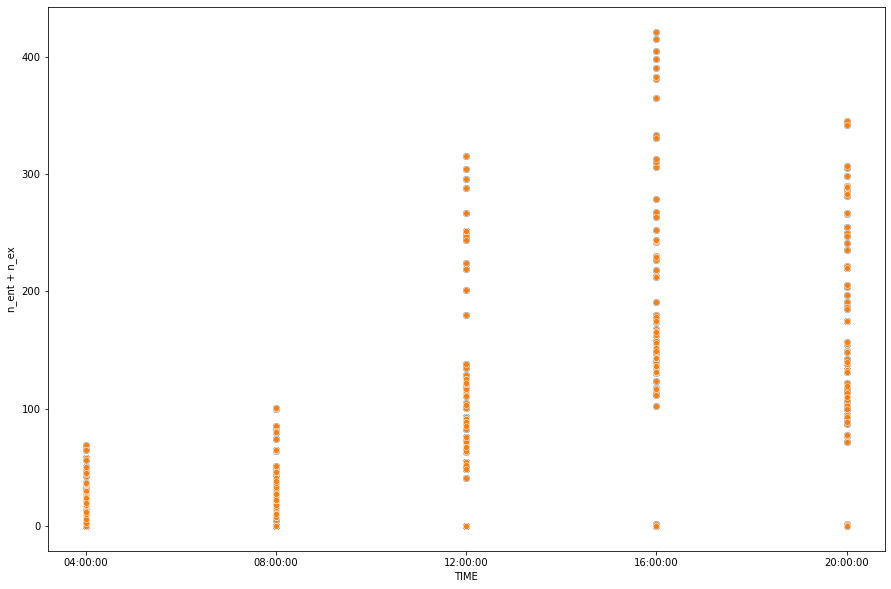

In [62]:
mask2 = ((df['LINENAME'] == '1') &
        ((df['day_name'] == 'Saturday')) 
       )
df[mask2]

df_ace2 = (df[mask2])

f, axs = plt.subplots(1,1, figsize = (15, 10))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
plt.show()

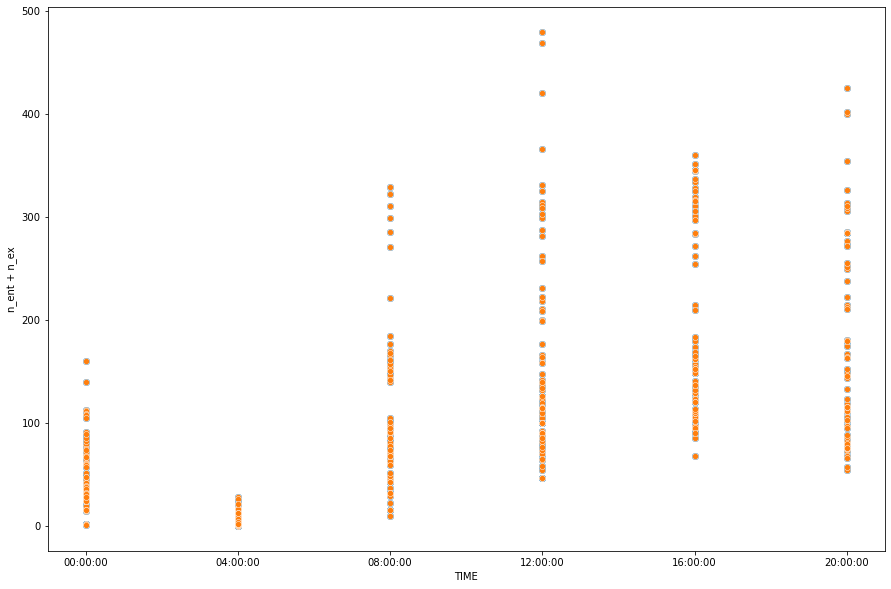

In [63]:
mask2 = ((df['LINENAME'] == '1') &
        ((df['day_name'] == 'Monday')) 
       )
df[mask2]

df_ace2 = (df[mask2])

f, axs = plt.subplots(1,1, figsize = (15, 10))
# plt.xticks(range(0, 10000, 500))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
# axs.hist(df_ace['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
# axs =sns.pairplot(df_ace)
plt.show()

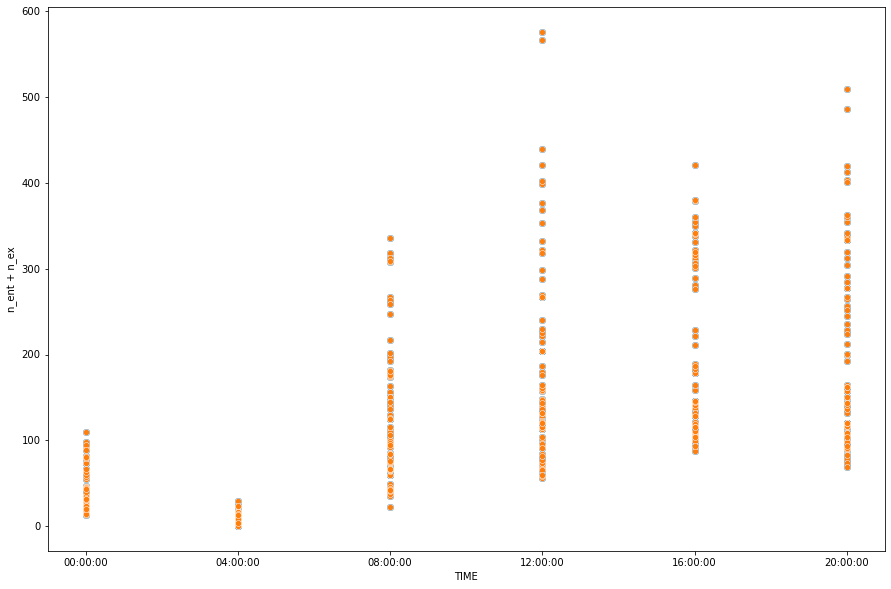

In [64]:
mask2 = ((df['LINENAME'] == '1') &
        ((df['day_name'] == 'Tuesday')) 
       )
df[mask2]

df_ace2 = (df[mask2])

f, axs = plt.subplots(1,1, figsize = (15, 10))
# plt.xticks(range(0, 10000, 500))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
# axs.hist(df_ace['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
# axs =sns.pairplot(df_ace)
plt.show()

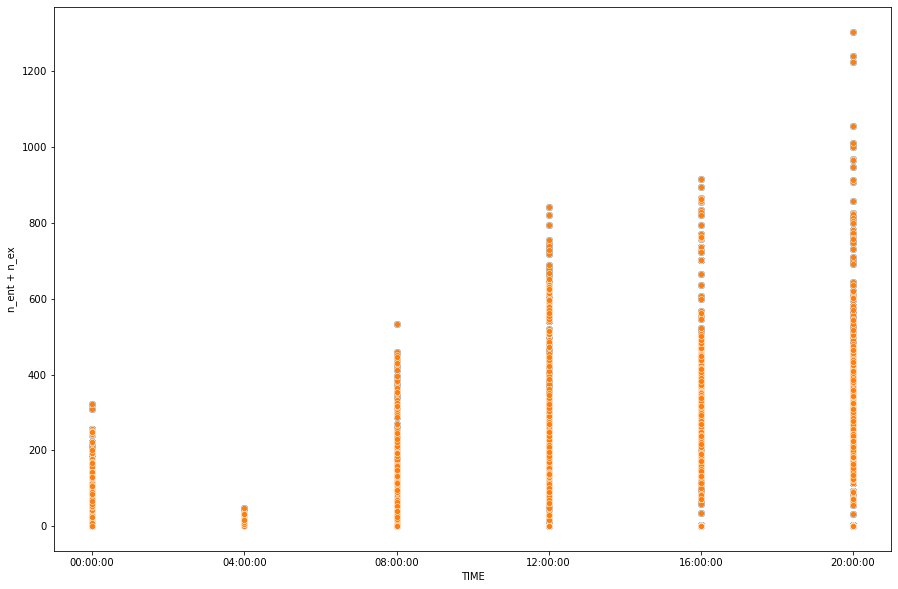

In [65]:
mask2 = ((df['LINENAME'] == 'JNQRZ6W') &
        ((df['day_name'] == 'Monday')) 
       )
df[mask2]

df_ace2 = (df[mask2])

f, axs = plt.subplots(1,1, figsize = (15, 10))
# plt.xticks(range(0, 10000, 500))
axs.scatter(df_ace2.TIME, df_ace2['n_ent + n_ex'])
# axs.hist(df_ace['n_ent + n_ex'])
axs = sns.scatterplot(data = df_ace2, x = "TIME", y= df_ace2["n_ent + n_ex"])
# axs =sns.pairplot(df_ace)
plt.show()

In [66]:
"""
Creating final grouping into a new frame for export

"""


df_clean = df.groupby(['LINENAME','date_time', 'day_name', 'TIME']).agg({'net_ent':'sum',
                                                            'net_ex':'sum',
                                                            'n_ent + n_ex': 'sum'}).reset_index()
df_clean

,LINENAME,date_time,day_name,TIME,net_ent,net_ex,n_ent + n_ex
0,1,2021-09-01 08:00:00,Wednesday,08:00:00,104.0,501.0,605.0
1,1,2021-09-01 12:00:00,Wednesday,12:00:00,196.0,501.0,697.0
2,1,2021-09-01 16:00:00,Wednesday,16:00:00,460.0,399.0,859.0
3,1,2021-09-01 20:00:00,Wednesday,20:00:00,460.0,287.0,747.0
4,1,2021-09-02 00:00:00,Thursday,00:00:00,28.0,53.0,81.0
...,...,...,...,...,...,...,...
1499,JNQRZ6W,2021-11-26 04:00:00,Friday,04:00:00,100.0,188.0,288.0
1500,JNQRZ6W,2021-11-26 08:00:00,Friday,08:00:00,185.0,902.0,1087.0
1501,JNQRZ6W,2021-11-26 12:00:00,Friday,12:00:00,1389.0,5564.0,6953.0
1502,JNQRZ6W,2021-11-26 16:00:00,Friday,16:00:00,5543.0,8270.0,13813.0


In [67]:
"""
Renaming line names to show  location
"""

df_clean['LINENAME'] = np.where(df_clean['LINENAME'] == '1', 'Line 1 : Canal & Varick St',df_clean['LINENAME'])

df_clean['LINENAME'] = (np.where(df_clean['LINENAME'] == 'ACE', 
                                 'Line ACE : Av Americas & WBroadway',df_clean['LINENAME']))

df_clean['LINENAME'] = (np.where(df_clean['LINENAME'] == 'JNQRZ6W', 
                                 'Line JNQRZ6W : Canal & Broadway/Lafayette',df_clean['LINENAME']))

In [68]:
df_clean

,LINENAME,date_time,day_name,TIME,net_ent,net_ex,n_ent + n_ex
0,Line 1 : Canal & Varick St,2021-09-01 08:00:00,Wednesday,08:00:00,104.0,501.0,605.0
1,Line 1 : Canal & Varick St,2021-09-01 12:00:00,Wednesday,12:00:00,196.0,501.0,697.0
2,Line 1 : Canal & Varick St,2021-09-01 16:00:00,Wednesday,16:00:00,460.0,399.0,859.0
3,Line 1 : Canal & Varick St,2021-09-01 20:00:00,Wednesday,20:00:00,460.0,287.0,747.0
4,Line 1 : Canal & Varick St,2021-09-02 00:00:00,Thursday,00:00:00,28.0,53.0,81.0
...,...,...,...,...,...,...,...
1499,Line JNQRZ6W : Canal & Broadway/Lafayette,2021-11-26 04:00:00,Friday,04:00:00,100.0,188.0,288.0
1500,Line JNQRZ6W : Canal & Broadway/Lafayette,2021-11-26 08:00:00,Friday,08:00:00,185.0,902.0,1087.0
1501,Line JNQRZ6W : Canal & Broadway/Lafayette,2021-11-26 12:00:00,Friday,12:00:00,1389.0,5564.0,6953.0
1502,Line JNQRZ6W : Canal & Broadway/Lafayette,2021-11-26 16:00:00,Friday,16:00:00,5543.0,8270.0,13813.0


In [69]:
"""
Renaming column names
"""

df_clean.rename(columns = 
                 {'LINENAME': 'Line Name and Location',
                 'date_time': 'Date and Time',
                 'day_name': 'Day',
                 'TIME': '4hr Time Interval Ending at',
                 'net_ent': 'Net Entries',
                 'net_ex': 'Net Exits',
                 'n_ent + n_ex': 'Total Entries & Exits'}, inplace = True)




In [70]:
df_clean.to_csv('pandas_mta_2021.csv')